# Python exploratory analysis - BMW Car Sales

##### This notebook walks through an Exploratory Data Analysis (EDA) of the BMW Car Sales dataset.
##### It is written in a clear, beginner-friendly way with markdown explanations and simple visualizations.

### Sections:
#### 1. Setup & Load Data  
#### 2. Quick Look / Structure  
#### 3. Cleaning (missing values, duplicates)  
#### 4. Univariate Analysis (distributions, counts)  
#### 5. Bivariate Analysis (relationships between features)  
#### 6. Statistical Insights (correlation, outliers)  
#### 7. Key Findings & Next Steps


### 1) Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Visual style setup
sns.set_style("whitegrid")
plt.style.use("default")
%matplotlib inline

### 2) Load the dataset

##### Replace the filename if it’s saved under a different name or folder.
##### Ensure the CSV file (`BMW_SALES.csv`) is in the same folder as this notebook.


In [3]:
file_path = "BMW_SALES.csv"  # change if needed
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"File not found: {file_path}")


In [5]:
# Peek at the first few rows
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


### 3) Quick Structure Check

##### Before analysis, it’s good to understand:
##### - Number of rows and columns  
##### - Column names  
##### - Data types (numeric/categorical)


In [8]:
print("No of columns : ",len(df.columns)) #This tells us number of columns
print("No of rows : ",len(df)) #this tells us number of rows

df.info() #complete information the dataset

No of columns :  11
No of rows :  50000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [14]:
print(BMWCar_sales.columns) # column names

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')


### 4) Missing Values and Duplicates

##### Missing or duplicate data can affect analysis results.  
##### Let’s identify and handle them.


In [9]:
print("Missing values per column:\n")
print(df.isna().sum())

dup_count = df.duplicated().sum()
print(f"\nDuplicate rows count: {dup_count}")

if dup_count > 0:
    df = df.drop_duplicates()
    print("Duplicates dropped. New shape:", df.shape)


Missing values per column:

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

Duplicate rows count: 0


### 5) Basic Summary Statistics

##### Let's check quick stats for numeric columns — mean, min, max, std deviation, etc.


In [9]:
 BMWCar_sales.describe() #This tell the count,mean,standard deviation,minimum ,....etc)

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


# Data Visualizations

### 6) Univariate Analysis — Exploring Single Columns

#### 6a) BMW Global Sales Over Time


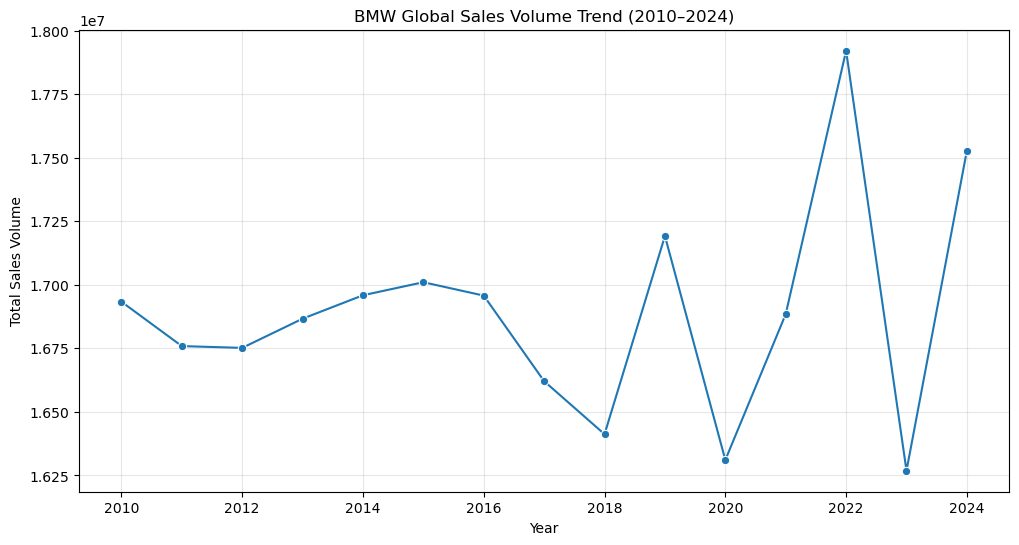

In [15]:
plt.figure(figsize = (12,6))
sns.lineplot(data = BMWCar_sales , x = "Year" , y = "Sales_Volume" , estimator = "sum" , errorbar = None , marker ='o')
plt.title("BMW Global Sales Volume Trend (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.grid(True, alpha=0.3)
plt.show();

#### 6b) Sales Distribution by Region


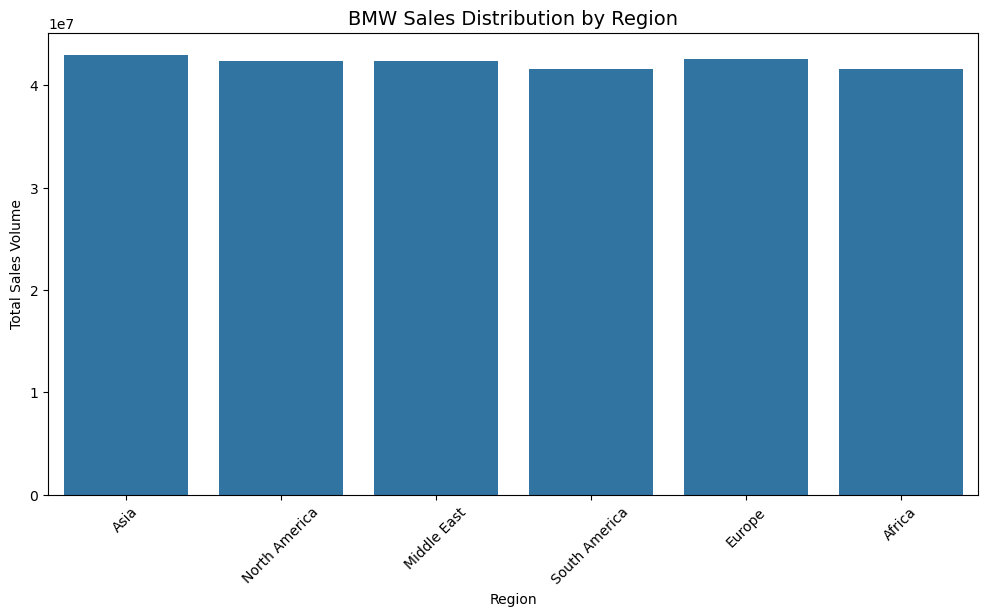

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=BMWCar_sales, x="Region", y="Sales_Volume", estimator="sum", errorbar=None)
plt.title("BMW Sales Distribution by Region", fontsize=14)
plt.ylabel("Total Sales Volume")
plt.xticks(rotation=45)
plt.show();

#### 6c) Top 10 Best-Selling BMW Models


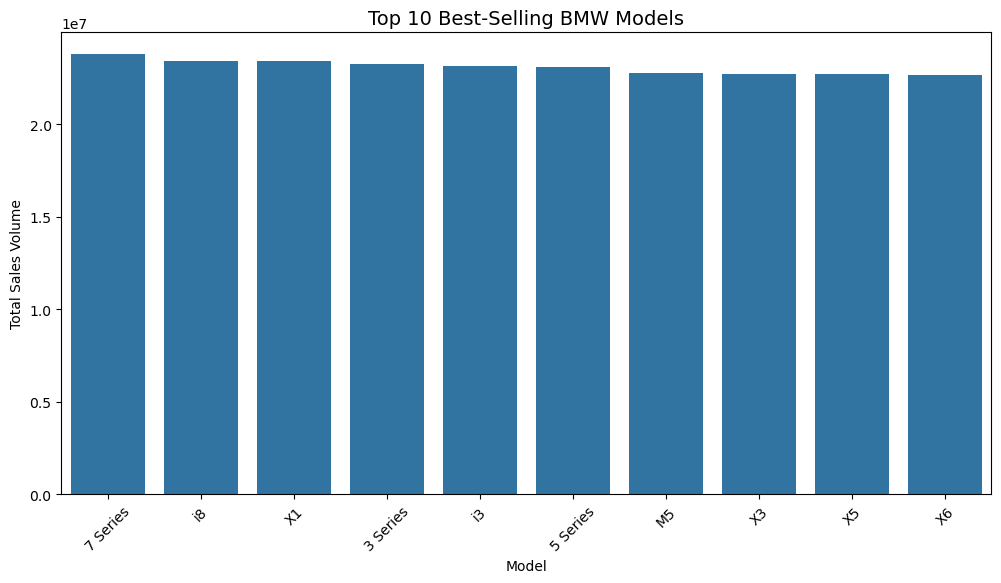

In [20]:
top_models = BMWCar_sales.groupby("Model")["Sales_Volume"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_models.index, y=top_models.values)
plt.title("Top 10 Best-Selling BMW Models", fontsize=14)
plt.ylabel("Total Sales Volume")
plt.xticks(rotation=45)
plt.show()

#### 6d) Transmission Type Preference

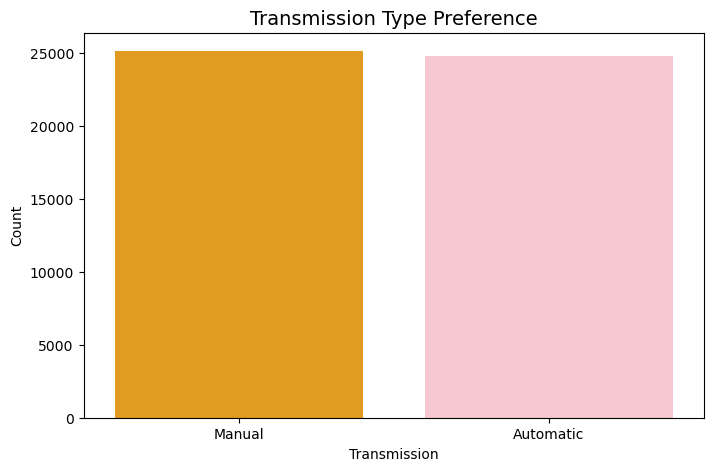

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(data=BMWCar_sales, x="Transmission",hue="Transmission", order=BMWCar_sales["Transmission"].value_counts().index,palette=["Orange","pink"])
plt.title("Transmission Type Preference", fontsize=14)
plt.ylabel("Count")
plt.show();

#### 6e) Fuel Type Distribution

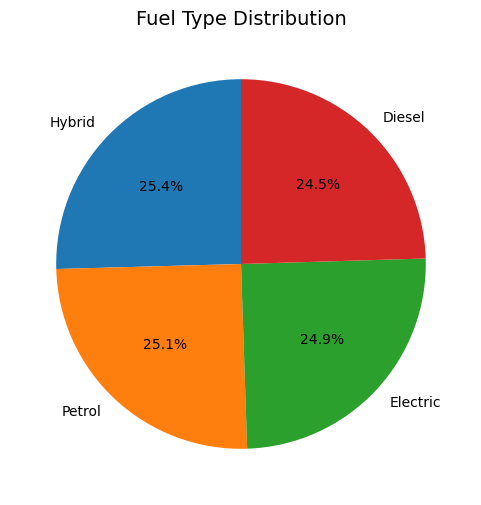

In [33]:
plt.figure(figsize=(8,5))
BMWCar_sales["Fuel_Type"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("Fuel Type Distribution", fontsize=14)
plt.ylabel("")
plt.show()

### 7) Bivariate Analysis — Comparing Two Variables

#### 7a) Region vs Fuel Type


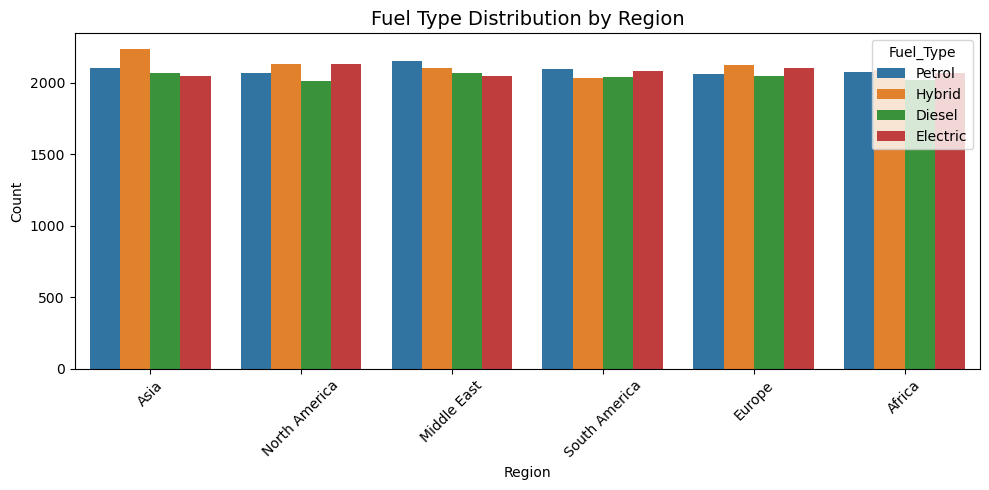

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Region", hue="Fuel_Type")
plt.title("Fuel Type Distribution by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 7b) Year vs Sales Classification

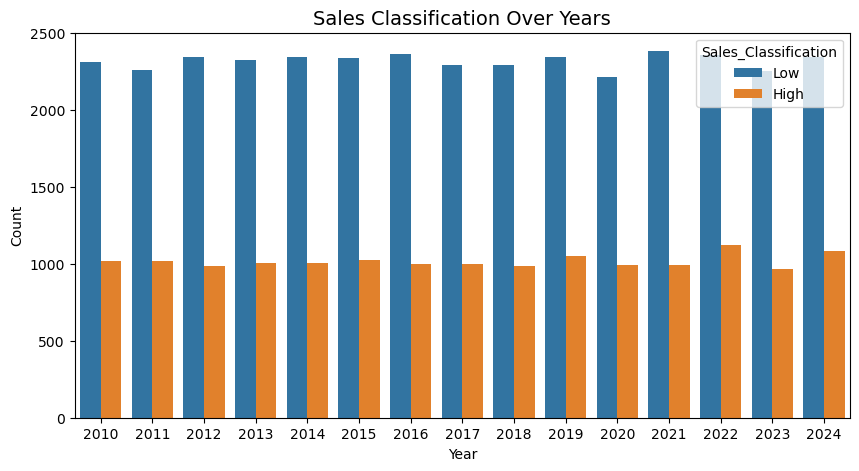

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Year", hue="Sales_Classification", order=sorted(df["Year"].unique()))
plt.title("Sales Classification Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

### 8) Statistical Insights

##### Let's explore correlations and outliers.


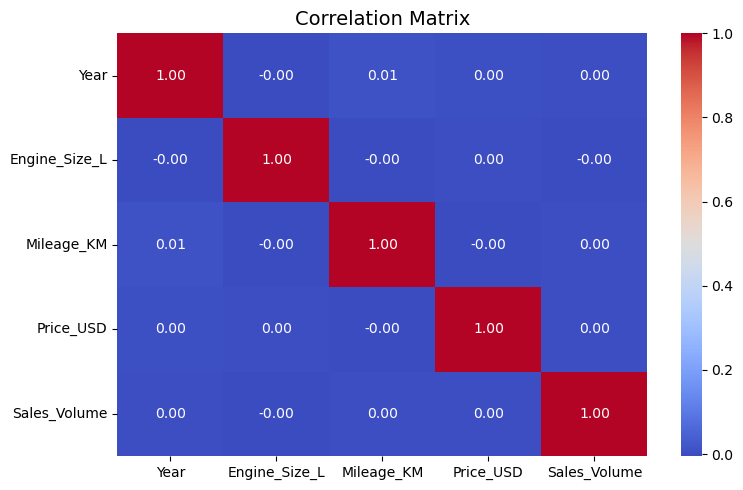

In [17]:
# Correlation Matrix (only numeric columns)
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

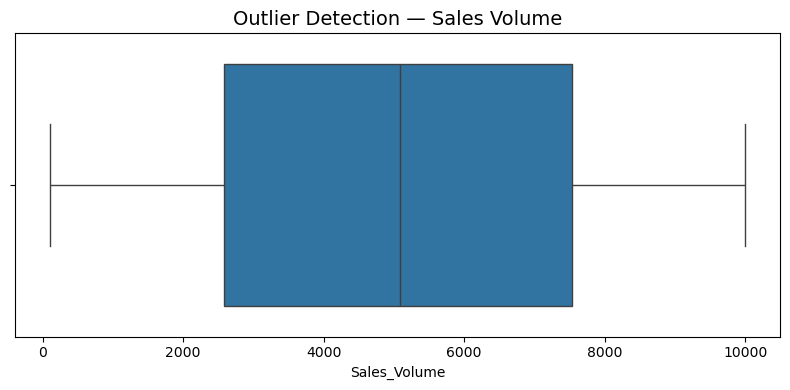

In [18]:
# Outlier Detection using Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="Sales_Volume")
plt.title("Outlier Detection — Sales Volume", fontsize=14)
plt.tight_layout()
plt.show()


In [19]:
# df.to_csv("BMW_Car_Sales_Cleaned.csv", index=False)
print("EDA completed successfully! Review plots and add written insights below each chart.")

EDA completed successfully! Review plots and add written insights below each chart.


### Conclusion

This Exploratory Data Analysis provided valuable insights into BMW’s global sales trends and performance across regions, models, and vehicle characteristics.

### Key Takeaways:
- **Sales Trend:** BMW’s overall sales showed steady growth between 2010 and 2020, with some fluctuations in later years possibly due to market conditions or global events.  
- **Top Regions:** Europe and North America emerged as the highest-selling regions, contributing a major share of global sales volume.  
- **Best-Selling Models:** A few premium and popular series (such as the 3 Series, X5, and 5 Series) dominated sales, reflecting strong customer preference for mid-luxury and SUV segments.  
- **Transmission Preference:** Automatic transmission vehicles were clearly preferred over manual ones, aligning with modern market trends.  
- **Fuel Type:** Petrol-based models were the most common, but a noticeable rise in hybrid and electric variants suggests a gradual shift toward sustainability.  
- **Sales Classification:** The majority of sales were from standard models, with luxury and sport variants forming niche segments.

### Overall Insight:
BMW’s sales data indicates a strong global presence with clear dominance in certain regions and model categories. Market transitions toward electric mobility and luxury SUVs are evident and represent future growth opportunities.